In [1]:
from fastai.text.all import *

In [2]:
#from pathlib import Path
#path = Path("../../Datasets/NLP/IMBd")
path = untar_data(URLs.IMDB)
path

Path('/home/javi/.fastai/data/imdb')

In [3]:
path.ls()

(#7) [Path('/home/javi/.fastai/data/imdb/tmp_clas'),Path('/home/javi/.fastai/data/imdb/tmp_lm'),Path('/home/javi/.fastai/data/imdb/test'),Path('/home/javi/.fastai/data/imdb/imdb.vocab'),Path('/home/javi/.fastai/data/imdb/train'),Path('/home/javi/.fastai/data/imdb/README'),Path('/home/javi/.fastai/data/imdb/unsup')]

In [4]:
(path/'train').ls()

(#4) [Path('/home/javi/.fastai/data/imdb/train/labeledBow.feat'),Path('/home/javi/.fastai/data/imdb/train/pos'),Path('/home/javi/.fastai/data/imdb/train/unsupBow.feat'),Path('/home/javi/.fastai/data/imdb/train/neg')]

In [5]:
dls = TextDataLoaders.from_folder(path, is_lm=True, valid='test')

In [8]:
dls.show_batch(max_n=3)

,text,text_
0,"xxbos xxmaj often laugh out loud , sometimes sad story of 2 working divorced guys -- xxmaj lemmon a neurotic clean "" house husband "" and xxmaj matthau a slob sportswriter -- who decide to live together to cut down on expenses . \n\n xxmaj nicely photographed and directed . xxmaj the script is very barbed -- that is , there 's always more than one side to almost every line .","xxmaj often laugh out loud , sometimes sad story of 2 working divorced guys -- xxmaj lemmon a neurotic clean "" house husband "" and xxmaj matthau a slob sportswriter -- who decide to live together to cut down on expenses . \n\n xxmaj nicely photographed and directed . xxmaj the script is very barbed -- that is , there 's always more than one side to almost every line . xxmaj"
1,"something more . i would asset that this movie has something which should be interesting for all the modern film makers , specifically those who focus on the decaying horror genre . xxmaj this is the mutilation , the idea which gives coherence to the film ; the fact of a human being mutilated produces a deeper horror than death and torture . i remember how sick the sensation was , when","more . i would asset that this movie has something which should be interesting for all the modern film makers , specifically those who focus on the decaying horror genre . xxmaj this is the mutilation , the idea which gives coherence to the film ; the fact of a human being mutilated produces a deeper horror than death and torture . i remember how sick the sensation was , when the"
2,"a crush on him . xxmaj in xxmaj turkey , xxmaj bond teams up with lovable sidekick xxmaj xxunk xxmaj bey . xxmaj bond must retrieve the device , protect the damsel in distress , and get both safely back to xxmaj london . xxmaj bond screenwriter xxmaj bruce xxmaj xxunk worked on the script , and he 's done a good job of making the game the same but different to","crush on him . xxmaj in xxmaj turkey , xxmaj bond teams up with lovable sidekick xxmaj xxunk xxmaj bey . xxmaj bond must retrieve the device , protect the damsel in distress , and get both safely back to xxmaj london . xxmaj bond screenwriter xxmaj bruce xxmaj xxunk worked on the script , and he 's done a good job of making the game the same but different to the"


In [9]:
class ShowGraphEveryBatchCallback(Callback):
    "Update a graph of training and validation loss"
        
    def after_batch(self):
        if self.iter%15 == 0:
            rec   = self.learn.recorder
            iters = range(len(rec.losses))
            x_bounds = (0, self.n_epoch * self.n_iter)
            y_bounds = (0, 10)
            self.progress.mbar.update_graph([(iters, rec.losses)], x_bounds, y_bounds)

In [12]:
learn = language_model_learner(dls,
                               AWD_LSTM,
                               metrics=[accuracy, Perplexity()],
                               path=path,
                               wd=0.1,
                               cbs = [ShowGraphEveryBatchCallback]).to_fp16()

In [17]:
for parameter in learn.model.parameters():
    print(parameter.requires_grad)

True
False
False
False
False
False
False
False
False
False
False
False
False
True


In [13]:
learn.cbs

(#7) [TrainEvalCallback,Recorder,ProgressCallback,ShowGraphEveryBatchCallback,ModelResetter,RNNCallback,MixedPrecision]

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.390143,4.170024,0.281579,64.717033,09:59


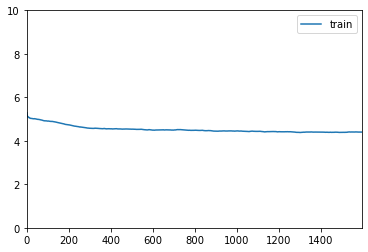

In [15]:
learn.fit_one_cycle(1, 1e-2)